# House Price Prediction

**Analyst:** Viet Dang

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
# <font color="red">1. Executive Summary </font>  

### <font color="yellow">**Business Problem:**</font>  
In the competitive real estate market of King County, USA, accurate and efficient house price prediction is paramount for real estate companies. Accurate price predictions empower companies to make informed decisions, perform market analysis, and enhance customer service. In this context, two tasks emerge: predicting the house prices as a continuous variable and categorizing them into "high_price" (values greater than or equal to 450,000) or "lower" (values less than 450,000). Selecting the most suitable models for these tasks is vitally important, which can address these problems:
- Optimize Pricing Strategies: determine optimal listing prices for properties based on historical data and market trends to maximize returns for sellers.
- Identify investment opportunities: identify properties that are undervalued or have growth potential.
- Forecast Market Trends: Predict market trends and property values, enabling the company to proactively respond to chaging conditions and align business strategies accordingly.

### <font color="yellow">**Data Set:**</font>

Our study is based on an extensive dataset containing diverse attributes related to house sales in King County. This dataset serves as the foundation for our predictive models (we have done a Exploratory Data Analysis at [2. Data Preprocessing](#cell_Preprocessing) )

### <font color="yellow">**Methods:**</font>
Our research employs a methodical approach to predicting house prices and categorizing them into "high_price" or "lower" categories. We explore and evaluate various models, ranging from sophisticated Multilayer Perceptrons (MLPs) to fundamental models like Linear Regression and Random Forest. Regarding the MLP models, we experimented with different optimizers, including RMSprop, Adam, and Adadelta, to obtain the best suitable model. This comprehensive approach enables us to make informed comparisons between intricate and straightforward models, ensuring the selection of the most effective techniques for the tasks at hand. (see more at the section [3. Predictive Modeling](#cell_model))

### <font color="yellow">**Experiments:**</font>
Evaluation Metrics: We adopted a range of evaluation metrics to comprehensively assess model performance, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and the R2 Score, with respect the predicting the house price. Regarding categorize the house price, we utilized various metrics, including accuracy, kappa, recall, f-1, and precision.

Visual Analysis: To gain insights into model performance, we created graphical representations that illustrated how each model compared in terms of predictive accuracy. (see more at the section [Experiments Report](#cell_report))
### <font color="yellow">**Obtained Results:**</font>
(see more at the section [4.1.1 Evaluation](#cell_report) and [4.2.1 Evaluation](#cell_report))

Our extensive analysis yielded the following results:

**For predicting the house price:**

"MLP model 1" consistently outperformed other models in terms of MAE, MSE, and R2 Score. This indicates that it provided the most accurate and reliable predictions of house prices.

"MLP model 3" and "Linear Regression" did not significantly enhance predictive accuracy, especially when considering the computational resources required for training.

**For categorizing the house price:**

"Random Forest" also exhibited strong performance, with a slightly higher accuracy and Kappa score on the validation set compared to "MLP model 1."

### <font color="yellow">**Recommendation:**</font>
1. Price Prediction Task: Implement "MLP model 1" (which is included in this report) as your primary tool for precise house price prediction. Its exceptional performance in all the metrics makes it the best choice for this task.
2. House Price Categorization Task: Deploy Random Forest for categorizing house prices as "high" or "low". This model offers higher accuracy and Kappa score, ensuring accurate categorization while being computationally efficienct and interpretable.

It is important to note that while, for predicting the house price, "MLP model 1" exels in accuracy, it demands more computational resources for training. Therefore, choosing the right model depends on company's constraints (read more in Recommendation part at [Experiments Report](#cell_report))



<a id = "cell_Preprocessing"></a>
# <font color="red">2. Data Preprocessing </font>  

*Carry out necessary data preprocessing and exploration.*

In [ ]:
#import library and connect to google drive
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, confusion_matrix, cohen_kappa_score, classification_report, accuracy_score, ConfusionMatrixDisplay

import math
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Firstly, we import the dataset to analyze

In [ ]:
# Import file
#define the folder path where the files are located
file_path = '/content/drive/MyDrive/Colab Notebooks/A2_Datasets/'
#list all files in the folder
file_list = os.listdir(file_path)

#find the file with the name customer
customer_file_name = 'Part1_house_price.csv'

if customer_file_name in file_list:
  customer_file_path = file_path + customer_file_name

  #r2ead pandas
  df_task1 = pd.read_csv(customer_file_path)
else:
  print('there is no such file')

df1 = df_task1.copy()


After import the dataset for task 1, we start doing EDA

In [ ]:
#Check the dataframe
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#checking the information of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
print(df1.nunique())

id               21436
date               372
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [ ]:
df1.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


There is no missing value in this dataset. However, there are some data cleaning that are needed to be done:
- The date column will be dropped as it does not produce insighful information.
- There are some duplicates in ID column, which is supposed to have unique value. We will investigate this further.
- Drop the zipcode column since, if it is not linked to the location, it can bias to the model.



In [ ]:
# Extract the date part before 'T', convert to datetime, and format
df1['date'] = pd.to_datetime(df1['date'].str.split('T').str[0], format='%Y%m%d')

In [ ]:
#check unique value of the dataset
# print(df1.nunique())
v = df1.groupby('id').size().reset_index(name = 'count')
v = v[v['count'] > 1] #get "ID" where it shows up more than 2 time in the dataset
print(df1[df1['id'].isin(v['id'].tolist())])

               id       date      price  bedrooms  bathrooms  sqft_living  \
93     6021501535 2014-07-25   430000.0         3       1.50         1580   
94     6021501535 2014-12-23   700000.0         3       1.50         1580   
313    4139480200 2014-06-18  1380000.0         4       3.25         4290   
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
324    7520000520 2014-09-05   232000.0         2       1.00         1240   
325    7520000520 2015-03-11   240500.0         2       1.00         1240   
345    3969300030 2014-07-23   165000.0         4       1.00         1000   
346    3969300030 2014-12-29   239900.0         4       1.00         1000   
371    2231500030 2014-10-01   315000.0         4       2.25         2180   
372    2231500030 2015-03-24   530000.0         4       2.25         2180   
717    8820903380 2014-07-28   452000.0         6       2.25         2660   
718    8820903380 2015-01-02   730000.0         6       2.25         2660   

The reason why there are IDs showing up more than 1 time is because they are been sold twice. To keep model from being biased, we keep the value with the lastest date of sold in the market, which reflects the lastest value of the houses.

In [ ]:
# Sort DataFrame by 'ID' and 'date' in descending order
df1 = df1.sort_values(by=['id', 'date'], ascending=[True, False])

# Drop duplicates based on 'ID', keeping the first occurrence (latest date)
df1 = df1.drop_duplicates(subset='id', keep='first')
df1.shape

(21436, 21)

In [ ]:
#Drop the ID and Date column
columns_to_drop = ['id', 'date', 'zipcode']
df1.drop(columns_to_drop, inplace = True, axis = 1)

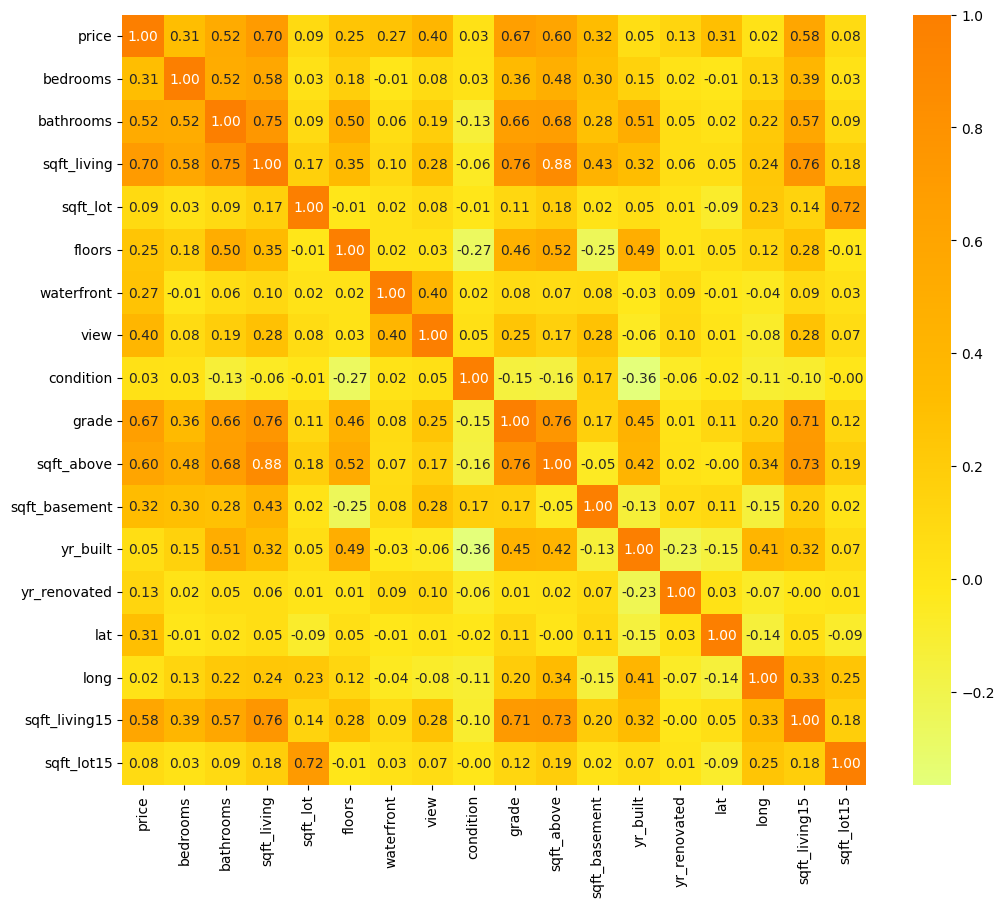

In [ ]:
corelation=df1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corelation, annot=True, fmt='.2f', cmap='Wistia')
plt.show()

Text(0.5, 1.0, 'Price distribution')

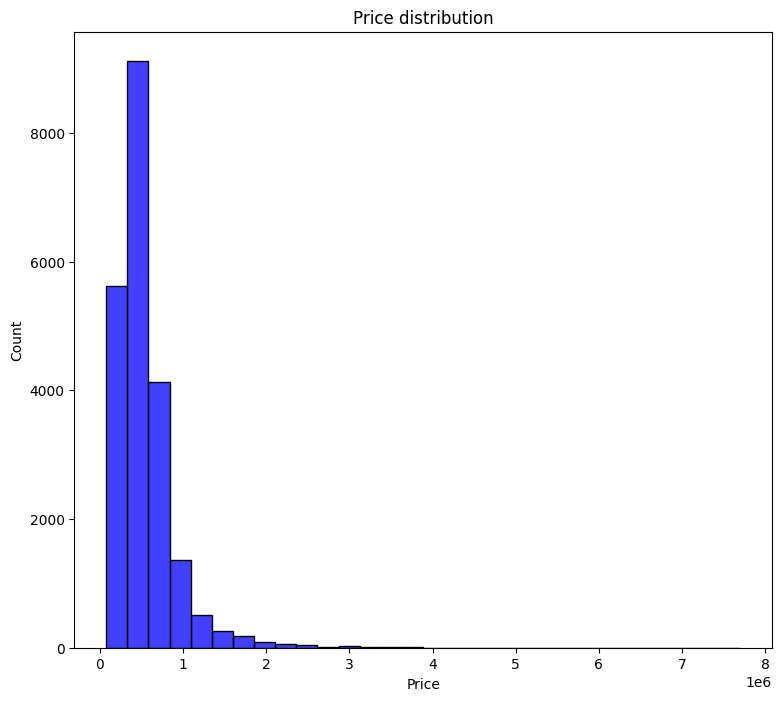

In [ ]:
plt.figure(figsize=(9, 8))
sns.histplot(df1['price'], color='blue', bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price distribution')

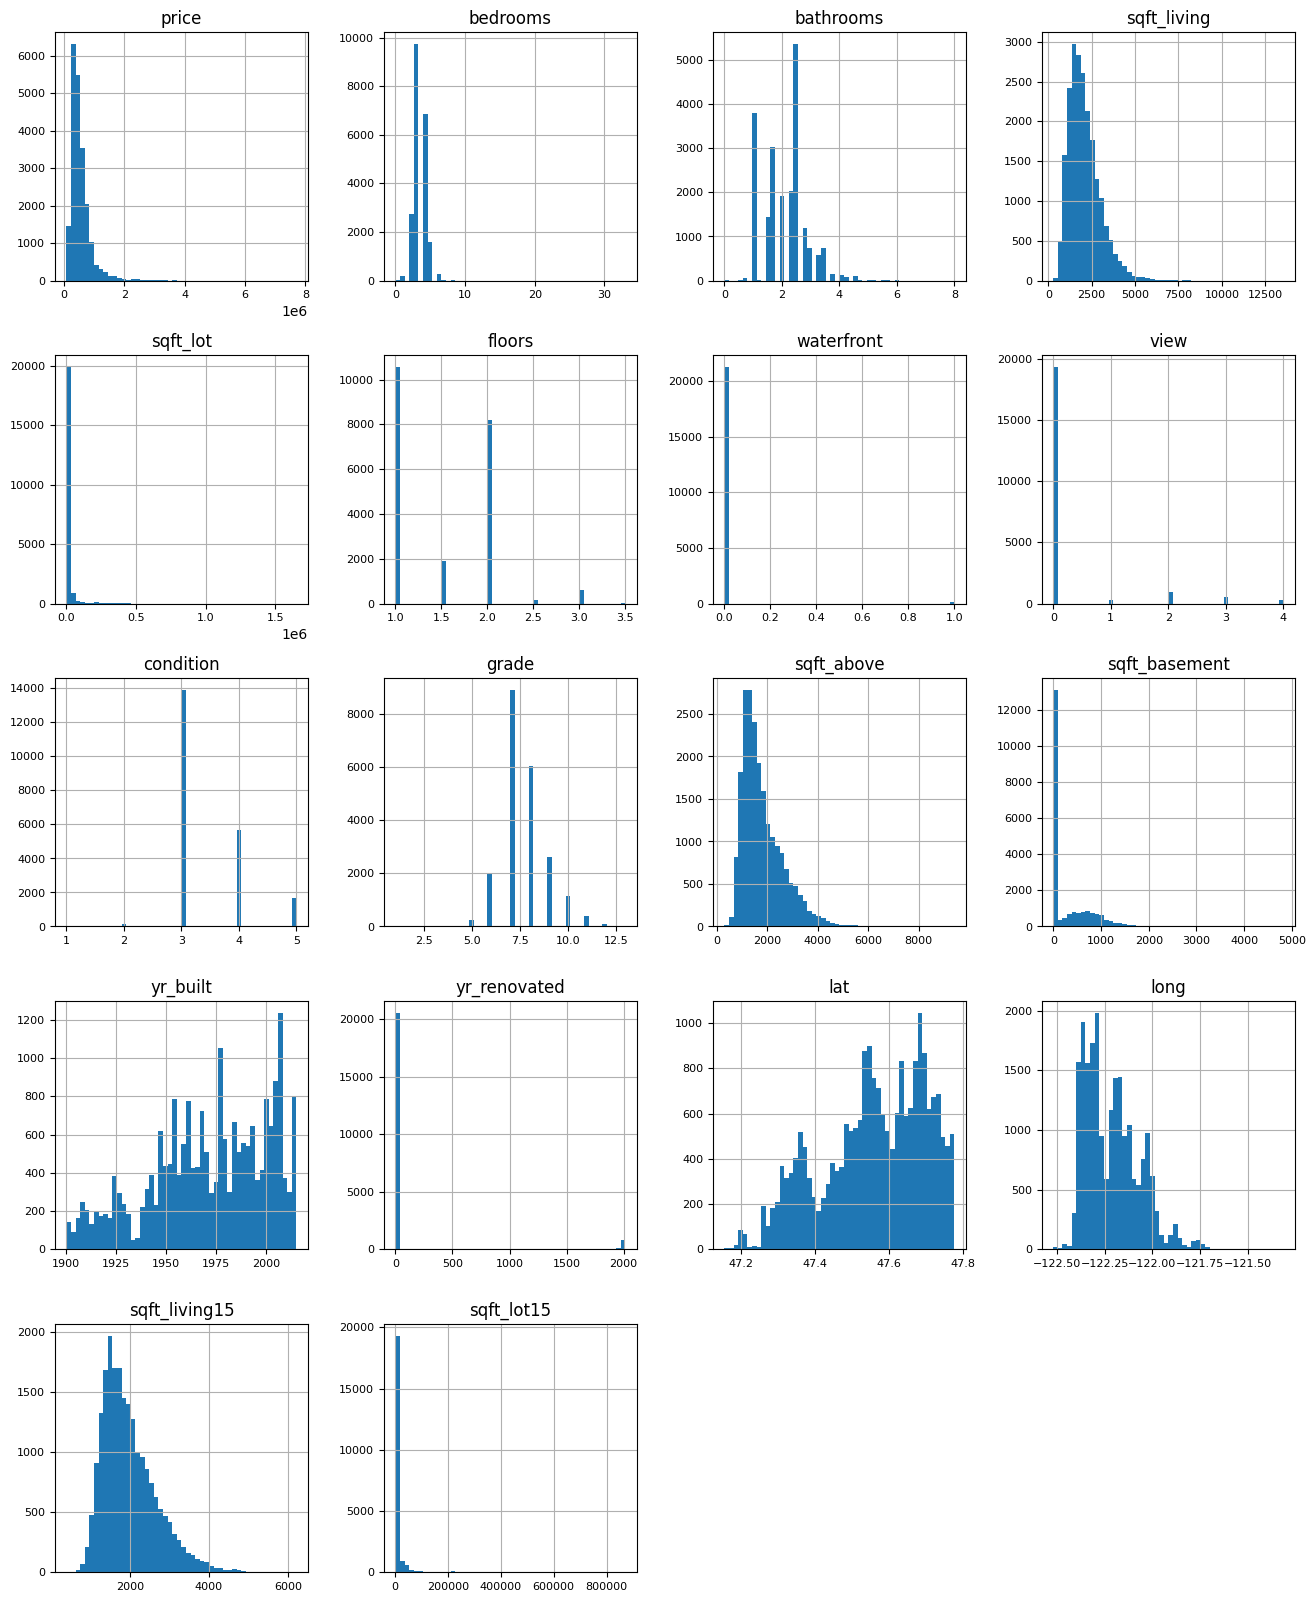

In [ ]:
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

During the exploratory data analysis (EDA), several key insights emerged:
- The distribution of prices is left-skewed, with 75% of the prices falling below 645,000 and a maximum price of 7,700,000.
- Geographic attributes like longitude and latitude indicate that the dataset predominantly represents houses located in three to four major areas within the King region.
- Attributes such as sqft_living and sqft_above display relatively normal distributions within the dataset.

Furthermore, examining the correlation matrix highlights significant observations:
- The attribute "square living" (sqft_living) showcases the strongest positive correlation with house prices, suggesting that larger houses command higher prices.
- Other features, including bathrooms, garage, sqft_above, and sqft_living15, demonstrate moderate positive correlations with house prices.

However, attributes such as yr_built, condition, and sqft_lot exhibit weaker correlations with house prices, indicating that these factors may have less influence on variations in house prices.

In the next section, we will use different to predict the price of house based on provided attributes.

---

<a id = "cell_model"></a>
# <font color="red">3. Predictive Modeling</font>  

## 3.1. House price prediction

In this session, we will solve two business problem, housing pricce and housing category

For housing price predicting, we will use two models:

- Multilayer Perceptron (MLP)
- Linear Regression

For housing price categorical, where "high_price" is larger or equal to 450,000 and "low_price" is smaller than 450,000, we will use:

- Multilayer Perceptron Classifier
- Random Forest

The models, which are shown in this code, are the best models after fine-tuning and experimenting with different features. The intepretation of each will be discussed the next section.

Firstly, we split data for training and validation

In [ ]:
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df1_train, df1_valid = train_test_split(df1,
                                      test_size=valid_size,
                                      random_state=2020)

In [ ]:
label_col = 'price'
df1_y_train = df1_train[[label_col]]
df1_x_train = df1_train.drop(label_col, axis=1)
df1_y_valid = df1_valid[[label_col]]
df1_x_valid = df1_valid.drop(label_col, axis=1)

print('Size of training set: ', len(df1_x_train))
print('Size of validation set: ', len(df1_x_valid))

Size of training set:  15005
Size of validation set:  6431


Before the data can be applied to a deep learning model. Missing values needs to be dealed with, and the data needs to be scaled to `[-1,1]` range.

Create an imputation model using training set and use it to impute both training and validation data.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df1_x_train)
df1_x_train = pd.DataFrame(scaler.transform(df1_x_train),
                            columns = df1_x_train.columns, index = df1_x_train.index)
df1_x_valid = pd.DataFrame(scaler.transform(df1_x_valid),
                            columns = df1_x_valid.columns, index = df1_x_valid.index)

print('X train min =', round(df1_x_train.min().min(),4), '; max =', round(df1_x_train.max().max(), 4))
print('X valid min =', round(df1_x_valid.min().min(),4), '; max =', round(df1_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0106 ; max = 1.5376


In [ ]:
df1_x_valid.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
317,0.090909,0.31250,0.123774,0.059895,0.0,0.0,0.0,0.75,0.583333,0.179825,0.000000,0.765217,0.0,0.298668,0.295987,0.328696,0.065302
12747,0.090909,0.12500,0.081509,0.005756,0.4,0.0,0.0,0.50,0.416667,0.118421,0.000000,0.260870,0.0,0.899253,0.183946,0.172174,0.007539
6899,0.090909,0.12500,0.064906,0.005775,0.0,0.0,0.0,0.50,0.500000,0.094298,0.000000,0.469565,0.0,0.917777,0.143813,0.130435,0.007063
17833,0.121212,0.31250,0.180377,0.006127,0.4,0.0,0.0,0.50,0.583333,0.262061,0.000000,0.904348,0.0,0.601722,0.547659,0.361739,0.007446
13396,0.121212,0.28125,0.184151,0.004098,0.0,0.0,0.0,1.00,0.500000,0.128289,0.307506,0.478261,0.0,0.685895,0.098662,0.269565,0.004996
10366,0.060606,0.18750,0.061887,0.002794,0.0,0.0,0.0,1.00,0.500000,0.089912,0.000000,0.034783,0.0,0.773481,0.127090,0.210435,0.005455
19157,0.030303,0.21875,0.055094,0.003644,0.0,0.0,0.0,0.50,0.500000,0.052632,0.060533,0.321739,0.0,0.829054,0.204849,0.133913,0.005029
10467,0.121212,0.31250,0.177358,0.006784,0.4,0.0,0.0,0.50,0.583333,0.257675,0.000000,0.782609,0.0,0.244069,0.270067,0.293913,0.008078
15510,0.121212,0.31250,0.132830,0.011084,0.0,0.0,0.0,0.50,0.500000,0.110746,0.181598,0.565217,0.0,0.418915,0.160535,0.231304,0.008327
7918,0.090909,0.31250,0.160755,0.033776,0.0,0.0,0.0,0.75,0.583333,0.135965,0.215496,0.495652,0.0,0.266818,0.169732,0.210435,0.009643


### 3.1.1.MLP for predicting the price

Load required libraries for Deep Learning with Sequential model.

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy

Convert pandas data frames to `np` arrays.

In [ ]:
arr_x_train = np.array(df1_x_train)
arr_y_train = np.array(df1_y_train)
arr_x_valid = np.array(df1_x_valid)
arr_y_valid = np.array(df1_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (15005, 17)
Training samples:  15005
Validation samples:  6431


The second with `RMSProp` optimizer consists of 4 layers and the first uses 20% dropouts.

In [ ]:
def ANN(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])
    return(t_model)

Fit the model and record the history of training and validation.
As we specified `EarlyStopping` with `patience=20`, with luck the training will stop in less than 200 epochs.

In [ ]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

In [ ]:
model = ANN(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 180)               18180     
                                                                 
 dense_2 (Dense)             (None, 20)                3620      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 23,621
Trainable params: 23,621
Non-trainable params: 0
_________________________________________________________________


In summary, the architecture consists of an input layer followed by two hidden layers with 180 and 20 neurons respectively. Each hidden layer is likely utilizing the Rectified Linear Unit (ReLU) activation function. The model concludes with an output layer consisting of a single neuron, implying that this MLP is designed for regression tasks where it predicts a single numerical output value.

The total number of parameters in the model is 23,621, which represents the trainable parameters that the model learns during training. The model's architecture doesn't involve any complex operations or complex branching, making it relatively straightforward in terms of structure.

We now train the model.

In [ ]:
history1 = model.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/500
235/235 - 1s - loss: 332856721408.0000 - mean_absolute_error: 441343.5000 - val_loss: 181677096960.0000 - val_mean_absolute_error: 242445.2969 - 1s/epoch - 5ms/step
Epoch 2/500
235/235 - 0s - loss: 117218197504.0000 - mean_absolute_error: 205233.8750 - val_loss: 89342869504.0000 - val_mean_absolute_error: 168838.7344 - 370ms/epoch - 2ms/step
Epoch 3/500
235/235 - 0s - loss: 65320153088.0000 - mean_absolute_error: 147231.2500 - val_loss: 67962380288.0000 - val_mean_absolute_error: 147722.2969 - 358ms/epoch - 2ms/step
Epoch 4/500
235/235 - 0s - loss: 53193969664.0000 - mean_absolute_error: 138234.2812 - val_loss: 59576672256.0000 - val_mean_absolute_error: 132013.4375 - 428ms/epoch - 2ms/step
Epoch 5/500
235/235 - 0s - loss: 48110501888.0000 - mean_absolute_error: 134331.9219 - val_loss: 56032026624.0000 - val_mean_absolute_error: 137023.4375 - 426ms/epoch - 2ms/step
Epoch 6/500
235/235 - 1s - loss: 44756111360.0000 - mean_absolute_error: 130549.6719 - val_loss: 50869370880.0

In [ ]:
y_valid_predict = model.predict(arr_x_valid)
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)
r2 = r2_score(df1_y_valid, y_valid_predict)*100

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))
print(f"R2 of this ANN model is {r2}")

201/201 [==============================] - 0s 790us/step
Train MAE:  66085.57 , Train Loss:  11523838976.0
Val MAE:  70850.39 , Val Loss:  17185042432.0
R2 of this ANN model is 88.02991445890366


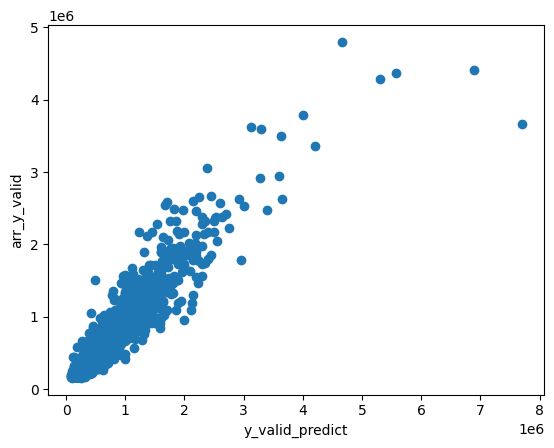

The Correlation between true and predicted values is:  0.941


In [ ]:
# plot
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

corr_result = np.corrcoef(arr_y_valid.reshape(1,6431)[0], y_valid_predict.reshape(1,6431)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))



In [ ]:
#this function is to plot the training history
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

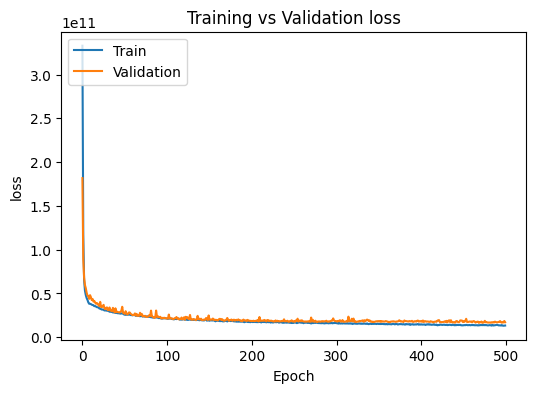

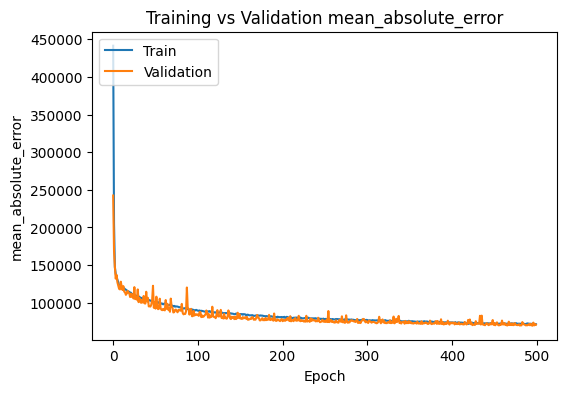

In [ ]:
hist = pd.DataFrame(history1.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

### 3.1.2. Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(df1_x_train, df1_y_train)

LinearRegression()

In [ ]:
# Predict on the test data
y_pred = reg.predict(df1_x_valid)

msa_lr = mean_absolute_error(df1_y_valid, y_pred)
mse_lr = mean_squared_error(df1_y_valid, y_pred)
r2_lr = r2_score(df1_y_valid, y_pred) *100

print("Mean Asbolute Error:", msa_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)


Mean Asbolute Error: 127340.16093871502
Mean Squared Error: 45957075033.06393
R-squared: 67.98901852618636


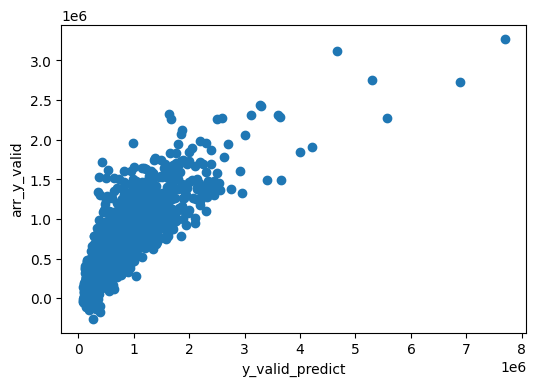

The Correlation between true and predicted values is:  0.825


In [ ]:
# plot
plt.scatter(arr_y_valid, y_pred)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

corr_result_linear_regression = np.corrcoef(arr_y_valid.reshape(1,6431)[0], y_pred.reshape(1,6431)[0])
print('The Correlation between true and predicted values is: ',round(corr_result_linear_regression[0,1],3))


## 3.2. House price classification

### 3.2.1. MLP classifier

Before building this model, we will create a column where price >= 450,000 is considered 1 and below is considered 0 so that we can feed the data to the model.

In [ ]:
df2 = df1.copy()
#Transform the price
df2['price_category'] = df2['price'].apply(lambda x: 1 if x >= 450000 else 0)
df2.drop('price', inplace = True, axis = 1)

In [ ]:
#split the dataset again for training and validation
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df2_train, df2_valid = train_test_split(df2,
                                      test_size=valid_size,
                                      random_state=2020)

In [ ]:
label_col = 'price_category'
df2_y_train = df2_train[[label_col]]
df2_x_train = df2_train.drop(label_col, axis=1)
df2_y_valid = df2_valid[[label_col]]
df2_x_valid = df2_valid.drop(label_col, axis=1)

print('Size of training set: ', len(df2_x_train))
print('Size of validation set: ', len(df2_x_valid))

Size of training set:  15005
Size of validation set:  6431


Feature Normalization using MinMaxScaler is essential for efficient neural network performance. It ensures consistent feature ranges, preventing domination by larger values. This stabilizes gradient descent optimization, crucial for weight updates during training, avoiding convergence issues due to unstable gradients from large-scale features. Scaled features also prevent vanishing/exploding gradients, vital for deep networks like MLPs. Convergence speeds up as scaled features foster faster learning and effective weight updates. Additionally, scaled features enhance model generalization to unseen data.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df2_x_train)
df2_x_train = pd.DataFrame(scaler.transform(df2_x_train),
                            columns = df2_x_train.columns, index = df2_x_train.index)
df2_x_valid = pd.DataFrame(scaler.transform(df2_x_valid),
                            columns = df2_x_valid.columns, index = df2_x_valid.index)

print('X train min =', round(df2_x_train.min().min(),4), '; max =', round(df2_x_train.max().max(), 4))
print('X valid min =', round(df2_x_valid.min().min(),4), '; max =', round(df2_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0106 ; max = 1.5376


In [ ]:
arr_x2_train = np.array(df2_x_train)
arr_y2_train = np.array(df2_y_train)
arr_x2_valid = np.array(df2_x_valid)
arr_y2_valid = np.array(df2_y_valid)

# convert class vectors to binary class matrices
arr_y2_train = to_categorical(arr_y2_train, 2)
arr_y2_valid = to_categorical(arr_y2_valid, 2)

Train shape: x= (15005, 17) , y= (15005, 2)
Test shape: x= (6431, 17) , y= (6431, 2)


In [ ]:
#build MLP classifier
def ANN_model_classification():
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(17,)))
    t_model.add(Dense(128, activation='relu'))
    t_model.add(Dense(64, activation='relu'))
    t_model.add(Dense(2, activation='softmax'))
    t_model.compile(optimizer=Nadam(learning_rate=0.01),
                   loss=categorical_crossentropy,
                   metrics=['accuracy'])
    t_model.summary()
    return t_model

# Create the model
model_classification = ANN_model_classification()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1800      
                                                                 
 dense_9 (Dense)             (None, 128)               12928     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 23,114
Trainable params: 23,114
Non-trainable params: 0
_________________________________________________________________


In summary, the model architecture consists of three hidden layers with increasing numbers of neurons and ReLU activation functions. The output layer has two neurons, indicating that the model is designed for binary classification (two classes). The softmax activation function ensures that the predicted class probabilities sum up to 1. The model consists of total 23,114 parameters.

Regarding the compilation, the model is compiled using the Nadam optimizer with a learning rate of 0.01. The loss function used is categorical cross-entropy, suitable for multi-class classification tasks. The accuracy metric is used to evaluate the model's performance during training and validation.



In [ ]:
history_classifier = model_classification.fit(arr_x2_train, arr_y2_train,
    batch_size=64,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x2_valid, arr_y2_valid))

Epoch 1/500
235/235 - 2s - loss: 0.3627 - accuracy: 0.8297 - val_loss: 0.3756 - val_accuracy: 0.8254 - 2s/epoch - 7ms/step
Epoch 2/500
235/235 - 0s - loss: 0.2805 - accuracy: 0.8765 - val_loss: 0.2468 - val_accuracy: 0.8938 - 465ms/epoch - 2ms/step
Epoch 3/500
235/235 - 0s - loss: 0.2652 - accuracy: 0.8840 - val_loss: 0.2575 - val_accuracy: 0.8873 - 449ms/epoch - 2ms/step
Epoch 4/500
235/235 - 0s - loss: 0.2619 - accuracy: 0.8860 - val_loss: 0.2506 - val_accuracy: 0.8902 - 450ms/epoch - 2ms/step
Epoch 5/500
235/235 - 0s - loss: 0.2561 - accuracy: 0.8884 - val_loss: 0.4023 - val_accuracy: 0.8419 - 464ms/epoch - 2ms/step
Epoch 6/500
235/235 - 0s - loss: 0.2474 - accuracy: 0.8951 - val_loss: 0.2419 - val_accuracy: 0.8997 - 406ms/epoch - 2ms/step
Epoch 7/500
235/235 - 0s - loss: 0.2469 - accuracy: 0.8933 - val_loss: 0.2592 - val_accuracy: 0.8907 - 389ms/epoch - 2ms/step
Epoch 8/500
235/235 - 0s - loss: 0.2434 - accuracy: 0.8944 - val_loss: 0.2405 - val_accuracy: 0.8988 - 490ms/epoch - 2ms/

In [ ]:
train_score2 = model_classification.evaluate(arr_x2_train, arr_y2_train, verbose=0)
valid_score2 = model_classification.evaluate(arr_x2_valid, arr_y2_valid, verbose=0)

print('Train Accuracy: ', round(train_score2[1], 2), ', Train Loss: ', round(train_score2[0], 2))
print('Val Accuracy: ', round(valid_score2[1], 2), ', Val Loss: ', round(valid_score2[0], 2))

Train Accuracy:  0.93 , Train Loss:  0.14
Val Accuracy:  0.9 , Val Loss:  0.63


In [ ]:
# Make predictions on the test set
y_pred_ANN = model_classification.predict(arr_x2_valid)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred_ANN)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred_ANN, axis=1)
arr_y2_valid_convert = np.argmax(arr_y2_valid, axis=1)

# Calculate the kappa score
kappa1 = cohen_kappa_score(arr_y2_valid_convert, y_pred_multiclass)
print("The result of Kappa is :", round(kappa1, 3))

# Generate the classification report
report1 = classification_report(arr_y2_valid_convert, y_pred_multiclass)

201/201 [==============================] - 0s 857us/step
The result of Kappa is : 0.796


### 3.2.2. Random Forest model

In [ ]:
#transform the dataset to feed the Random Forest model
label_col = 'price_category'
df2_y_train = df2_train[[label_col]]
df2_x_train = df2_train.drop(label_col, axis=1)
df2_y_valid = df2_valid[[label_col]]
df2_x_valid = df2_valid.drop(label_col, axis=1)


In [ ]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(df2_x_train, df2_y_train)

# Predict on the validation data
y_valid_pred = random_forest_model.predict(df2_x_valid)

kappa2 = cohen_kappa_score(df2_y_valid, y_valid_pred)

# Calculate accuracy on the validation set
accuracy = accuracy_score(df2_y_valid, y_valid_pred)

<ipython-input-53-c34d34a7f90a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(df2_x_train, df2_y_train)


In the next section, the results will be discussed in details.

<a id = "cell_report"></a>
# <font color="red">4. Experiments Report</font>  

## 4.1.House price prediction

### <font color="yellow">**4.1.1. Evaluation:**</font>  

For the house predicting price, there are 3 MLP models have been tested. The difference between 3 models is their optimizers, which are the following:
- Model 1: RMSprop with learning rate = 0.005, rho = 0.9, momentum = 0.0, epsilon = 1e-07, weight_decay = 0.0
- Model 2: Adam with Learning rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07
- Model 3: Adadelta with learning rate = 0.001, rho = 0.95, epsilon = 1e-07

One of the reason why we need to compare these models together and with linear regression is because using MLP consumes lots of resources. So it is always better to start from a simple model like linear regression.

One thing to note is that the results from these three MLP models can variate around 2-3% due to the fact that each time the models run, they learn in different ways, leading to the variation of each result, and also because of hold-out validation method we used in this study.

The results are shown in the table below

In [ ]:
models = ['MLP model 1', 'MLP model 2', 'MLP model 3', 'Linear Regression']

mae = [66564.99, 81076.29, 123731.26, 127340.16]
mse = [11162253312.0, 20086497280.0, 43600793600.0, 45957075033.06]
r2 = [87.95, 86.01, 62.93, 67.99]

data = {'Model': models, 'Mean Absolute Error (MAE)': mae, 'Mean Squared Error (MSE)': mse, 'R2 Score': r2}
performance = pd.DataFrame(data)

# Set 'Model' as the index
performance.set_index('Model', inplace=True)

# Display the DataFrame
performance

,Mean Absolute Error (MAE),Mean Squared Error (MSE),R2 Score
Model,,,
MLP model 1,66564.99,1.116225e+10,87.95
MLP model 2,81076.29,2.008650e+10,86.01
MLP model 3,123731.26,4.360079e+10,62.93
Linear Regression,127340.16,4.595708e+10,67.99


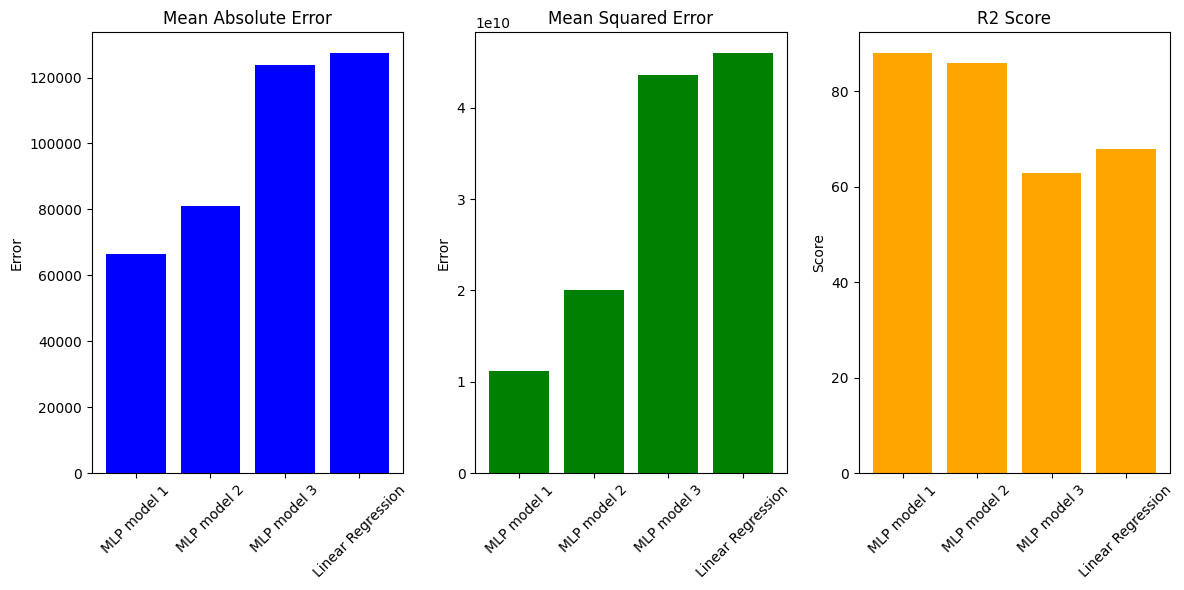

In [ ]:
plt.figure(figsize=(12, 6))
# Mean Absolute Error plot
plt.subplot(131)
plt.bar(models, mae, color='blue')
plt.title('Mean Absolute Error')
plt.ylabel('Error')
plt.xticks(rotation=45)

# Mean Squared Error plot
plt.subplot(132)
plt.bar(models, mse, color='green')
plt.title('Mean Squared Error')
plt.ylabel('Error')
plt.xticks(rotation=45)

# R2 score plot
plt.subplot(133)
plt.bar(models, r2, color='orange')
plt.title('R2 Score')
plt.ylabel('Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




Based on the graphs and the metric table:
- "MLP model 1" has the lowest MAE, indicating better predictive accuracy in terms of absolute error.
- "MLP model 1" has the lowest MSE, suggesting better overall predictive accuracy.
- R2 Score: "MLP model 1" has the highest R2 score, indicating that it explains more variance in the data compared to other models.

Considering all these metrics, "MLP model 1" appears to be the best-performing model among the options. The second best model is the "MLP model 2", which has slightly worse performance compared to the first model. On the other hand, model 3 does not perform much better than Linear Regression, indicating that it is not a good model since, to train an MLP model, it costs significantly more resources than a linear regression.

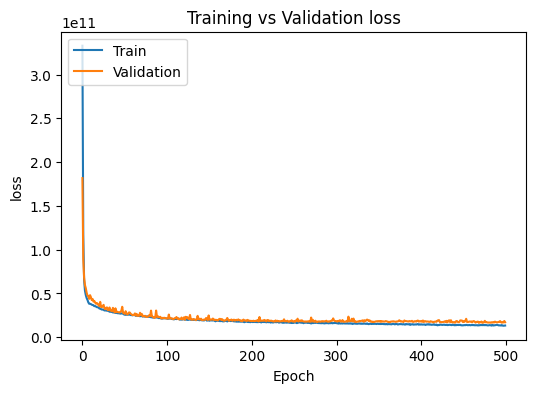

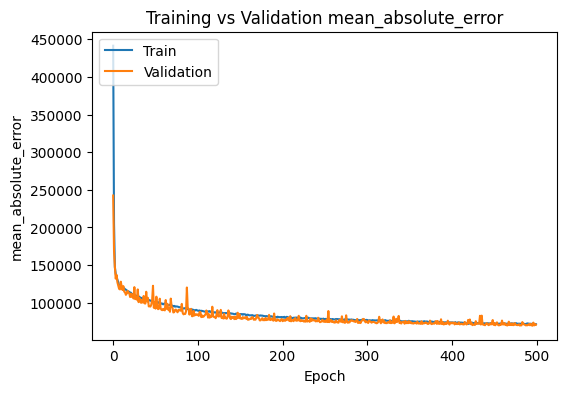

In [ ]:
hist = pd.DataFrame(history1.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

Regarding the MLP model 1's learning curve, this can be considered a good model since:
- The plot of training loss decreases to a point of stability
- The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

Therefore, we can conclude that the model is learning from the data, generalizing well to unseen examples, and converging to a low validation loss.

However, it is recommended to use cross-validation to test this model more to achieve a more reliable result (since we use split test 70-30 in this report).

### <font color="yellow">**4.1.2. Recommendation:**</font>  

Based on the analysis of the models and their performance metrics, "MLP model 1" stands out as the top performer in predicting house prices. It demonstrates superior accuracy with the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and the highest R2 Score among the available options. This indicates that "MLP model 1" offers the most precise and reliable predictions for house prices.

However, it's crucial to consider the potential downsides associated with deploying an MLP model like "MLP model 1." MLP models are known for their computational complexity and resource-intensive training process. While they excel in accuracy, they may require significant computational resources and time to train and may not be the most efficient choice for all applications.

## 4.2. Housing price category prediction

### <font color="yellow">**4.2.1. Evaluation:**</font>  

In [ ]:
# Display results
print("Results for ANN classification:")
print("Validation Accuracy:", round(valid_score2[1], 2))
print("Kappa Score:", round(kappa1, 3))
print("Classification Report:\n", report1)

print("\nResults for Random Forest:")
print("Validation Accuracy:", round(accuracy,2))
print("Kappa Score:", round(kappa2, 3))
print("Classification Report:\n", classification_report(df2_y_valid, y_valid_pred))

Results for ANN classification:
Validation Accuracy: 0.9
Kappa Score: 0.796
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      3205
           1       0.92      0.87      0.90      3226

    accuracy                           0.90      6431
   macro avg       0.90      0.90      0.90      6431
weighted avg       0.90      0.90      0.90      6431


Results for Random Forest:
Validation Accuracy: 0.91
Kappa Score: 0.813
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3205
           1       0.91      0.91      0.91      3226

    accuracy                           0.91      6431
   macro avg       0.91      0.91      0.91      6431
weighted avg       0.91      0.91      0.91      6431



Result for MLP classification:
- Validation accuracy: the ANN model achieved an accuracy of 90%, which indicates that it correctly predicted the class labels for 90% of the samples in the validation dataset.
- Kappa score; with the score of 0.796, it suggests substantial agreement beyond chance in the MLP model's predictions
- Classification report: looking at the precision, recall, and F1-score, we see that the MLP performs well. It was high precision (0.88 for class 0 and 0.92 for class 1), indicating that when it predicts a class, it is often correct. The F1-score (0.9 for both classes) is a harmonic mean of precision and recall and is also high, suggesting a good balance between precision and recall.

Result for Random Forest:
- Validation Accuracy: The Random Forest model achieved a slightly higher accuracy of 91% compared to the ANN model.
- Kappa Score: The Kappa score of 0.813 for the Random Forest model indicates even better agreement beyond chance than the ANN model.
- Classification Report: Similar to the ANN model, the Random Forest model shows high precision, recall, and F1-score for both classes (0.91 for all metrics). This indicates that the Random Forest model is performing consistently well for both classes.

Comparison:
- Both models perform exceptionally well in terms of accuracy, precision, recall, and F1-score.
- The Random Forest model outperforms the ANN model slightly in terms of accuracy and Kappa score.
- Both models have similar performance in terms of precision, recall, and F1-score, with all metrics around 0.91.

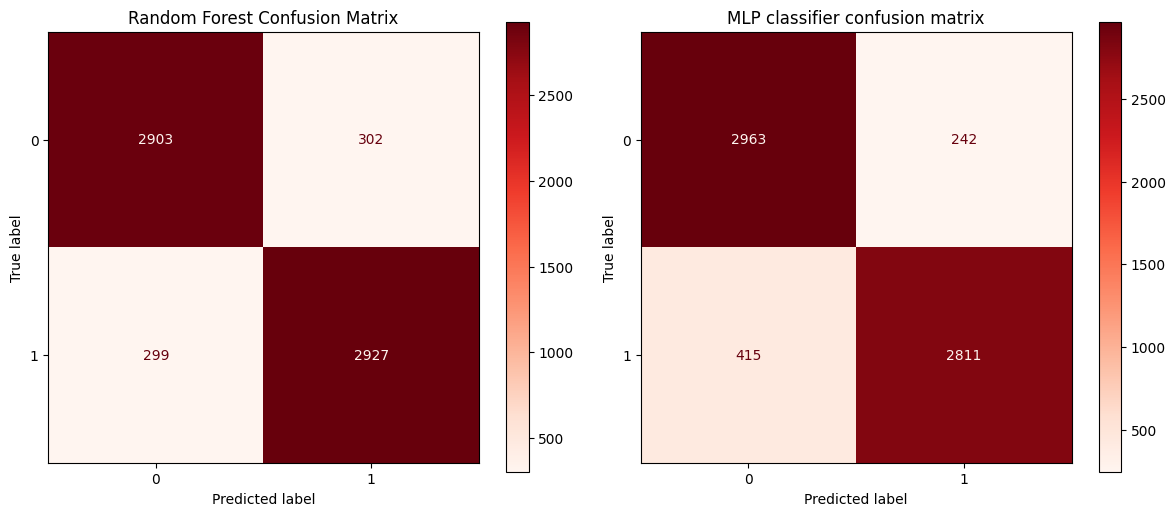

In [ ]:
# Create the confusion matrices
cm_randomforest = confusion_matrix(df2_y_valid, y_valid_pred)
cm1 = confusion_matrix(arr_y2_valid_convert, y_pred_multiclass)

# Create ConfusionMatrixDisplay objects
display_randomforest = ConfusionMatrixDisplay(confusion_matrix=cm_randomforest)
display = ConfusionMatrixDisplay(confusion_matrix=cm1)

# Create a figure with a fixed size and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first confusion matrix in the first subplot
display_randomforest.plot(ax=axes[0], cmap='Reds', values_format='d')
axes[0].set_title('Random Forest Confusion Matrix')

# Plot the second confusion matrix in the second subplot
display.plot(ax=axes[1], cmap='Reds', values_format='d')
axes[1].set_title('MLP classifier confusion matrix')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Regarding the confusion matrix:
- Both models, Random Forest and MLP, show reasonably good performance in terms of correctly classifying both "high" and "low" prices, as indicated by the high numbers of true positives and true negatives.
- Random Forest has slightly more false positives (302) compared to MLP (242), which means that it is more prone to predicting "low" prices as "high" when they are actually "low."
- MLP, on the other hand, has more false negatives (415) compared to Random Forest (299), indicating that it is more prone to predicting "high" prices as "low" when they are actually "high."
- Both models have a relatively balanced performance, as shown by the similar true positives and true negatives.
- The choice between these models may depend on specific business requirements and priorities. If minimizing Type I errors (false positives) is critical, then the MLP classifier might be preferred. If minimizing Type II errors (false negatives) is more important, then the Random Forest classifier might be a better choice.

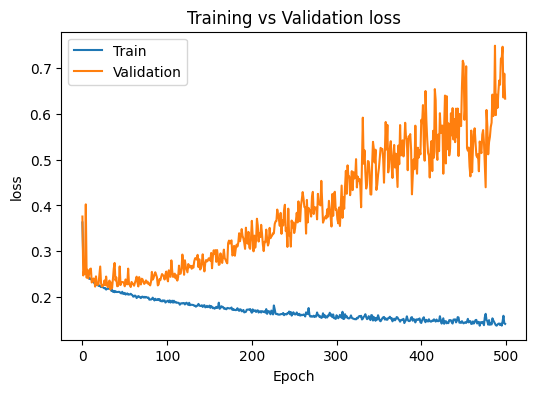

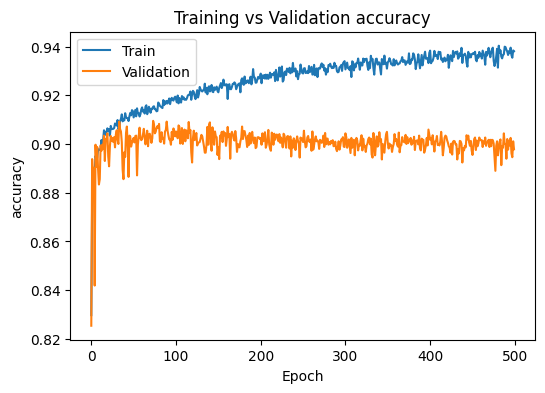

In [ ]:
hist = pd.DataFrame(history_classifier.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

From the history plot of training this MLP model, we can see that this could be the case of overfitting:
- The plot of training loss continues to decrease with experience
- The plot of validation loss decreases to a certain point and begins increasing again, making a huge gap between training and validation.

This could be the case that the model has learned the data too well, and often occurs if the model has more capacity than is required. We can improve this model better by making it less complicated.

### <font color="yellow">**4.2.1. Recommendation:**</font>  

In summary, both models perform well, but Random forest has a slightly higher accuracy and Kappa score on the validation set. This means that the Random Forest model is better at making accurate predictions and is more robust in handling the classification task at hand.

When deploying a model for predicting house prices, considerations such as computational efficiency and model interpretability are paramount. Random Forest models are renowned for their lower computational complexity compared to deep neural networks like ANNs, making them more suitable for real-time applications and cost-effective scaling.

Given the better performance, computational efficiency, and interpretability of the Random Forest model, I firmly recommend proceeding with the Random Forest model for the task of classifying house prices as high or low.